In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Downloads\Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape


(200, 5)

In [5]:
df.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df=df.drop(["Unnamed: 0"],axis=1)

In [12]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [77]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [78]:
df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [13]:
from matplotlib import pyplot as plt

In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


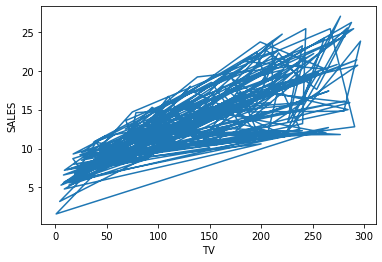

In [33]:
import numpy as np
x=np.array(df["TV"])
y=np.array(df["Sales"])
plt.xlabel("TV")
plt.ylabel("SALES")
plt.plot(df["TV"],df["Sales"])

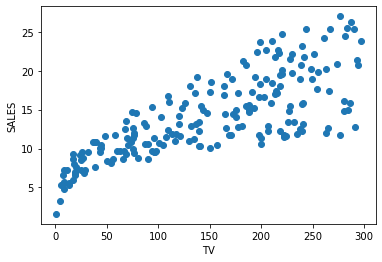

In [31]:
plt.xlabel("TV")
plt.ylabel("SALES")
plt.scatter(x,y)


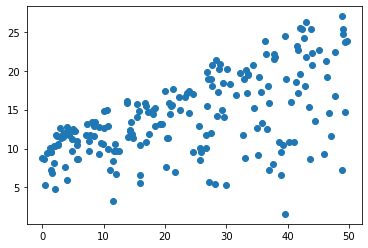

In [35]:
plt.scatter(df["Radio"],df["Sales"])

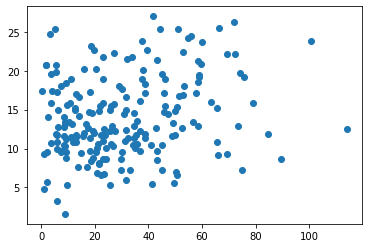

In [36]:
plt.scatter(df["Newspaper"],df["Sales"])

In [37]:
import seaborn as sns

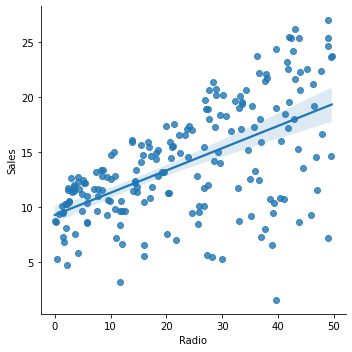

In [38]:
sns.lmplot(data=df,x='Radio',y="Sales")

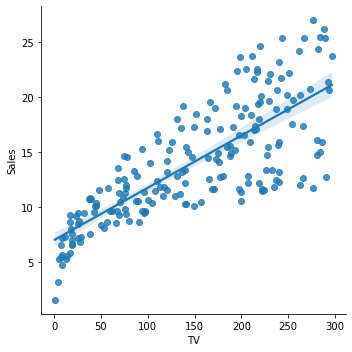

In [42]:
sns.lmplot(data=df,x='TV',y="Sales")

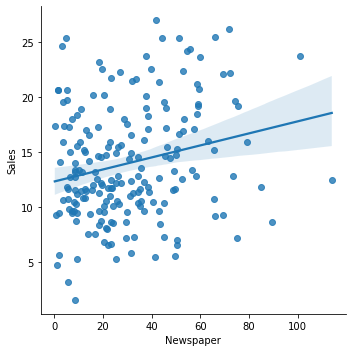

In [40]:
sns.lmplot(data=df,x='Newspaper',y="Sales")

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
linearreg=LinearRegression()

In [51]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [53]:
X_train.shape

(160, 3)

In [54]:
y_train.shape

(160,)

In [58]:
y_test.shape

(40,)

In [55]:
x=linearreg.fit(X_train,y_train

In [60]:
pred=x.predict(X_test)

In [61]:
pred

array([14.19983319, 10.56035147, 10.05755053,  6.56963966,  7.63455248,
       12.46375495,  9.17926174, 19.26580896, 12.68253491, 11.38702087,
        9.89995773, 16.53507796, 23.72359611,  9.69709431, 13.14226458,
       19.79441131,  9.59264754, 12.52972942, 11.64473583, 13.64523067,
       17.91177736, 10.67267386, 13.33382792, 13.59882874, 17.80072777,
       12.64150827,  9.74018018, 14.2320187 ,  7.66341439, 12.40768239,
       24.08086128, 12.15011545, 12.42922189, 15.3688345 ,  8.65420427,
       14.23265252, 13.93412263, 13.34703811, 18.30093115, 18.0022344 ])

In [65]:
comparision=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predicted':pred.flatten()
})
comparision.head()

,Actual,Predicted
0,11.6,14.199833
1,11.5,10.560351
2,11.3,10.057551
3,5.6,6.569640
4,9.5,7.634552


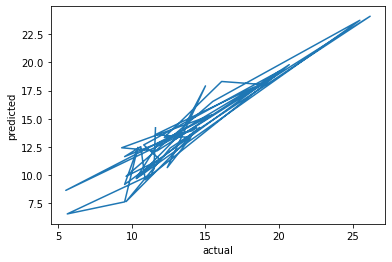

In [68]:
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot(comparision["Actual"],comparision["Predicted"])

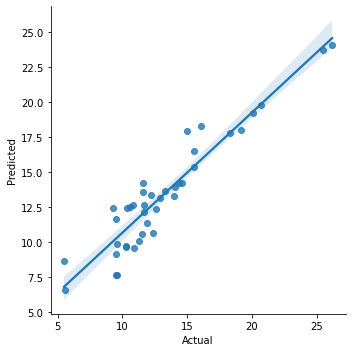

In [71]:
sns.lmplot(data=comparision,x='Actual',y="Predicted")

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [80]:
r2_score(y_test,pred)*100

88.1814653634431

In [81]:
mean_absolute_error(y_test,pred)

1.237121457133544

In [82]:
mean_squared_error(y_test,pred)

2.288918501472834